# Project Submission

This notebook will be your project submission. All tasks will be listed in the order of the Courses that they appear in. The tasks will be the same as in the Capstone Example Notebook, but in this submission you ___MUST___ use another dataset. Failure to do so will result in a large penalty to your grade in this course.

## Finding your dataset

Take some time to find an interesting dataset! There is a reading discussing various places where datasets can be found, but if you are able to process it, go ahead and use it! Do note, for some tasks in this project, each entry will need 3+ attributes, so keep that in mind when finding datasets. After you have found your dataset, the tasks will continue as in the Example Notebook. You will be graded based on the tasks and your results. Best of luck!

### As Reviewer: 
Your job will be to verify the calculations made at each "TODO" labeled throughout the notebook.

### First Step: Imports

In the next cell we will give you all of the imports you should need to do your project. Feel free to add more if you would like, but these should be sufficient.

In [1]:
import gzip
from collections import defaultdict
import random
import numpy
import scipy.optimize
import string
from nltk.stem.porter import PorterStemmer # Stemming

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

pd.options.display.max_columns = 50
%matplotlib inline

# Task 1: Data Processing

### TODO 1: Read the data and Fill your dataset

I will use the TMDB Dataset, a well-know movie dataset with ~5000 movies. It's publicy avaliable at [Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset). For the Task 1, I will select the following columns:

- `original_title`: the movie's title
- `popularity`: a number to measure how popular a film is. The higher the better.
- `budget`: the amount of money to produce the movie.
- `revenue`: the total amount of money earned by the movie.
- `vote_average`: the average of ratings given by users.

In [2]:
#YOUR CODE HERE
df_movies = pd.read_csv('data/movies_metadata.csv', sep=',', encoding='latin', low_memory=False)
df_movies = df_movies[['id', 'original_title', 'popularity', 'budget', 'revenue', 'vote_average']]
df_movies.head(10)

,id,original_title,popularity,budget,revenue,vote_average
0,862,Toy Story,21.946943,30000000,373554033.0,7.7
1,8844,Jumanji,17.015539,65000000,262797249.0,6.9
2,15602,Grumpier Old Men,11.7129,0,0.0,6.5
3,31357,Waiting to Exhale,3.859495,16000000,81452156.0,6.1
4,11862,Father of the Bride Part II,8.387519,0,76578911.0,5.7
5,949,Heat,17.924927,60000000,187436818.0,7.7
6,11860,Sabrina,6.677277,58000000,0.0,6.2
7,45325,Tom and Huck,2.561161,0,0.0,5.4
8,9091,Sudden Death,5.23158,35000000,64350171.0,5.5
9,710,GoldenEye,14.686036,58000000,352194034.0,6.6


### Data Cleaning

**According to dataset description, the information about `budget` for some movies are missing or incorrect**. Thus, in the cells bellow, we will select the lines only where the `budget` is numeric and greater than zero.

In [3]:
df_movies = df_movies[df_movies.budget.apply(lambda x: x.isnumeric())]
df_movies.budget = df_movies.budget.astype(np.float64)

In [4]:
df_movies = df_movies[(df_movies.budget > 0) & (df_movies.revenue > 0)]

Since the **Task 1** is a binary classification problem, I will create an aditional column to tell if the movie had a profit or not: 

In [5]:
df_movies['profit'] = df_movies.revenue - df_movies.budget
df_movies.profit = (df_movies.profit > 0)

print(df_movies.shape)
df_movies.head(10)

(5381, 7)


,id,original_title,popularity,budget,revenue,vote_average,profit
0,862,Toy Story,21.946943,30000000.0,373554033.0,7.7,True
1,8844,Jumanji,17.015539,65000000.0,262797249.0,6.9,True
3,31357,Waiting to Exhale,3.859495,16000000.0,81452156.0,6.1,True
5,949,Heat,17.924927,60000000.0,187436818.0,7.7,True
8,9091,Sudden Death,5.23158,35000000.0,64350171.0,5.5,True
9,710,GoldenEye,14.686036,58000000.0,352194034.0,6.6,True
10,9087,The American President,6.318445,62000000.0,107879496.0,6.5,True
13,10858,Nixon,5.092,44000000.0,13681765.0,7.1,False
14,1408,Cutthroat Island,7.284477,98000000.0,10017322.0,5.7,False
15,524,Casino,10.137389,52000000.0,116112375.0,7.8,True


### TODO 2: Split the data into a Training and Testing set

First shuffle your data, then split your data. Have Training be the first 80%, and testing be the remaining 20%. 

> I don't need to shuffle my data since it has no predefined order. In addition, I will use the **stratify** option of `train_test_split` method from *scikit-learn* to ensure the same proportion of positive/negative samples in both training and test datasets:

In [6]:
#YOUR CODE HERE
x = df_movies.drop(columns=['id', 'profit'])
y = df_movies.profit.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

#### Now delete your dataset
You don't want any of your answers to come from your original dataset any longer, but rather your Training Set, this will help you to not make any mistakes later on, especialy when referencing the checkpoint solutions.

In [7]:
#YOUR CODE HERE
del df_movies

### TODO 3: Extracting Basic Statistics

Next you need to answer some questions through any means (i.e. write a function or just find the answer) all based on the __Training Set:__
1. How many entries are in your dataset?
2. Pick a non-trivial attribute (i.e. verified purchases in example), what percentage of your data has this atttribute?
3. Pick another different non-trivial attribute, what percentage of your data share both attributes?

#### How many entries are in your dataset?

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4304, 5) (4304,)
(1077, 5) (1077,)


#### What percentage of each class in both train and test sets?

In [9]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([False,  True]), array([1300, 3004], dtype=int64))
(array([False,  True]), array([325, 752], dtype=int64))


#### What's the distribution of each feature per class?

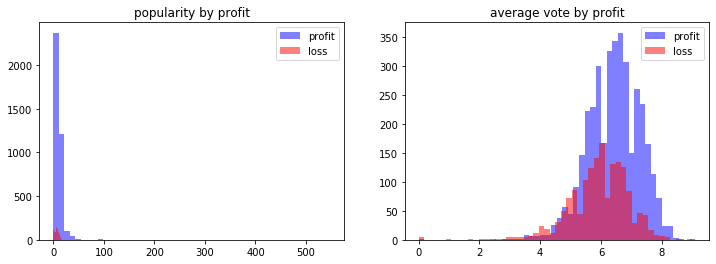

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
pop_profit = x.popularity[y == True].values.astype(np.float)
pop_loss = x.popularity[y == False].values.astype(np.float)
plt.hist(pop_profit, bins=50, color='blue', alpha=0.5, label='profit')
plt.hist(pop_loss, bins=50, color='red', alpha=0.5, label='loss')
plt.title('popularity by profit')
plt.legend()

plt.subplot(1, 2, 2)
vote_profit = x.vote_average[y == True].values.astype(np.float)
vote_loss = x.vote_average[y == False].values.astype(np.float)
plt.hist(vote_profit, bins=50, color='blue', alpha=0.5, label='profit')
plt.hist(vote_loss, bins=50, color='red', alpha=0.5, label='loss')
plt.title('average vote by profit')
plt.legend()
plt.show()

# Task 2: Classification

Next you will use our knowledge of classification to extract features and make predictions based on them. Here you will be using a Logistic Regression Model, keep this in mind so you know where to get help from.

### TODO 1: Define the feature function

This implementation will be based on ___any two___ attributes from your dataset. You will be using these two attributes to predict a third. Hint: Remember the offset!

In [11]:
#FIX THIS

def feature(d):
    feat = d[['popularity', 'vote_average']].values.astype(np.float64)
    return feat

### TODO 2: Fit your model

1. Create your __Feature Vector__ based on your feature function defined above. 
2. Create your __Label Vector__ based on the "verified purchase" column of your training set.
3. Define your model as a __Logistic Regression__ model.
4. Fit your model.

In [12]:
#YOUR CODE HERE
x_train = feature(x_train)
x_test = feature(x_test)

print(x_train.shape)
print(x_test.shape)

(4304, 2)
(1077, 2)


In [13]:
std = StandardScaler()
std = std.fit(x_train)

x_train = std.transform(x_train)
x_test = std.transform(x_test)

In [14]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### TODO 3: Compute Accuracy of Your Model

1. Make __Predictions__ based on your model.
2. Compute the __Accuracy__ of your model.

In [15]:
#YOUR CODE HERE
y_pred = clf.predict(x_train)
print('Acurracy (train): {:.2f}%'.format(accuracy_score(y_train, y_pred) * 100))

y_pred = clf.predict(x_test)
print('Acurracy (test): {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

Acurracy (train): 70.93%
Acurracy (test): 72.14%


# Task 3: Regression

In this section you will start by working though two examples of altering features to further differentiate. Then you will work through how to evaluate a Regularaized model.

In [16]:
#CHANGE PATH
path = "data/amazon_reviews_us_Home_Improvement_v1_00.tsv.gz"

#GIVEN
f = gzip.open(path, 'rt', encoding="utf8")
header = f.readline()
header = header.strip().split('\t')
reg_dataset = []
for line in f:
    fields = line.strip().split('\t')
    d = dict(zip(header, fields))
    d['star_rating'] = int(d['star_rating'])
    reg_dataset.append(d)

### TODO 1: Unique Words in a Sample Set

We are going to work with a new dataset here, as such we are going to take a smaller portion of the set and call it a Sample Set. This is because stemming on the normal training set will take a very long time. (Feel free to change sampleSet -> reg_dataset if you would like to see the difference for yourself)

1. Count the number of unique words found within the 'review body' portion of the sample set defined below, making sure to __Ignore Punctuation and Capitalization__.
2. Count the number of unique words found within the 'review body' portion of the sample set defined below, this time with use of __Stemming,__ __Ignoring Puctuation,__ ___and___ __Capitalization__.

In [17]:
#GIVEN for 1.
wordCount = defaultdict(int)
punctuation = set(string.punctuation)

#GIVEN for 2.
wordCountStem = defaultdict(int)
stemmer = PorterStemmer() #use stemmer.stem(stuff)

#SampleSet and y vector given
sampleSet = reg_dataset[:2*len(reg_dataset)//10]
y_reg = [d['star_rating'] for d in sampleSet]

In [18]:
for i, d in enumerate(sampleSet):
    sentence = ''.join([c for c in d['review_body'].lower() if not c in punctuation])
    for word in sentence.split():
        wordCount[word] += 1
        
print('#unique words:', len(wordCount.keys()))

#unique words: 156174


In [19]:
for i, d in enumerate(sampleSet):
    sentence = ''.join([c for c in d['review_body'].lower() if not c in punctuation])
    for word in sentence.split():
        wordCountStem[stemmer.stem(word)] += 1
        
print('#unique words wit steemer:', len(wordCountStem.keys()))

#unique words wit steemer: 131821


### TODO 2: Evaluating Classifiers

1. Given the feature function and your counts vector, __Define__ your X_reg vector. (This being the X vector, simply labeled for the Regression model)
2. __Fit__ your model using a __Ridge Model__ with (alpha = 1.0, fit_intercept = True).
3. Using your model, __Make your Predictions__.
4. Find the __MSE__ between your predictions and your y_reg vector.

In [20]:
#GIVEN FUNCTIONS
def feature_reg(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_body'].lower() if not c in punctuation])
    for w in r.split():
        if w in wordSet:
            feat[wordId[w]] += 1
    return feat

def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

#GIVEN COUNTS AND SETS
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

#Note: increasing the size of the dictionary may require a lot of memory
words = [x[1] for x in counts[:100]]

wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [21]:
#YOUR CODE HERE
X_reg = np.array([feature_reg(d) for d in sampleSet])
print(X_reg.shape)

(526956, 100)


In [22]:
reg = Ridge(alpha=1.0, fit_intercept=True)
reg.fit(X_reg, y_reg)

y_pred = reg.predict(X_reg)
print('MSE:', MSE(y_pred, y_reg))

MSE: 1.268190701607542


# Task 4: Recommendation Systems

For your final task, you will use your knowledge of simple similarity-based recommender systems to make calculate the most similar items.

The next cell contains some starter code that you will need for your tasks in this section.
Notice you should be back to using your __trainingSet__.

In [23]:
#GIVEN
attribute_1 = defaultdict(set)
attribute_2 = defaultdict(set)

### TODO 1: Fill your Dictionaries

1. For each entry in your training set, fill your default dictionaries (defined above). 

In [24]:
df_ratings = pd.read_csv('data/ratings_small.csv')

df_movies = pd.read_csv('data/movies_metadata.csv', sep=',', encoding='latin', low_memory=False)
df_movies = df_movies[df_movies.id.apply(lambda x: x.isnumeric())][['id', 'original_title']]
df_movies.id = df_movies.id.astype(np.int64)

df_merge = df_ratings.merge(df_movies, how='inner', left_on='movieId', right_on='id')
df_merge = df_merge[['userId', 'movieId', 'original_title', 'rating']]
df_merge.head(10)

,userId,movieId,original_title,rating
0,1,1371,Rocky III,2.5
1,4,1371,Rocky III,4.0
2,7,1371,Rocky III,3.0
3,19,1371,Rocky III,4.0
4,21,1371,Rocky III,3.0
5,22,1371,Rocky III,2.0
6,41,1371,Rocky III,3.5
7,78,1371,Rocky III,4.0
8,118,1371,Rocky III,3.0
9,130,1371,Rocky III,3.0


In [25]:
#YOUR CODE HERE
itemNames = {}

for _, row in df_merge.iterrows():
    user, item = row['userId'], row['movieId']
    attribute_1[item].add(user)
    attribute_2[user].add(item)
    itemNames[item] = row['original_title']

In [26]:
#GIVEN
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

def mostSimilar(n, m): #n is the entry index
    similarities = []  #m is the number of entries
    users = attribute_1[n]
    for i2 in attribute_1:
        if i2 == n: continue
        sim = Jaccard(users, attribute_1[i2])
        similarities.append((sim, i2))
    similarities.sort(reverse=True)
    return similarities[:m]

### TODO 1: Fill your Dictionaries

1. Calculate the __10__ most similar entries to the __first__ entry in your dataset, using the functions defined above.

In [27]:
#YOUR CODE HERE
query = df_merge.loc[0, 'movieId']
query

1371

In [28]:
itemNames[query]

'Rocky III'

In [29]:
mostSimilar(query, 10)

[(1.0, 160718),
 (1.0, 158238),
 (1.0, 148652),
 (1.0, 142507),
 (1.0, 140174),
 (1.0, 135536),
 (1.0, 134881),
 (1.0, 134569),
 (1.0, 134368),
 (1.0, 134158)]

In [30]:
[itemNames[movieID] for sim, movieID in mostSimilar(query, 10)]

['I Spy Returns',
 'Stolen Seas',
 'The Eleventh Victim',
 'Exit',
 'Rise of the Zombies',
 'Chi lavora Ã¨ perduto',
 'More of Me',
 'Jib',
 'One Tough Cop',
 'The Punk Rock Movie']

## Finished!

Congratulations! You are now ready to submit your work. Once you have submitted make sure to get started on your peer reviews!